# Cardio Good Fitness Case Study - Descriptive Statistics
The market research team at AdRight is assigned the task to identify the profile of the typical customer for each treadmill product offered by CardioGood Fitness. The market research team decides to investigate whether there are differences across the product lines with respect to customer characteristics. The team decides to collect data on individuals who purchased a treadmill at a CardioGoodFitness retail store during the prior three months. The data are stored in the CardioGoodFitness.csv file.

### The team identifies the following customer variables to study: 
  - product purchased, TM195, TM498, or TM798; 
  - gender; 
  - age, in years; 
  - education, in years; 
  - relationship status, single or partnered; 
  - annual household income ; 
  - average number of times the customer plans to use the treadmill each week; 
  - average number of miles the customer expects to walk/run each week; 
  - and self-rated fitness on an 1-to-5 scale, where 1 is poor shape and 5 is excellent shape.

### Perform descriptive analytics to create a customer profile for each CardioGood Fitness treadmill product line.

In [28]:
# Load the necessary packages

import numpy as np
import pandas as pd

In [29]:
# Load the Cardio Dataset

mydata = pd.read_csv('CardioGoodFitness.csv')

In [30]:
mydata.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Partnered,5,5,80000,153
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,36007,66
3,TM195,19,Male,12,Single,3,3,50089,85
4,TM195,20,Male,13,Partnered,4,2,35247,38


In [31]:
mydata.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,108,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.505556,3.344444,58262.877778,115.116667
std,NaN,6.943498,NaN,1.617055,NaN,1.080540,0.970643,20115.717438,60.366597
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,25000.000000,30.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,45360.000000,74.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,51165.000000,95.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,74775.750000,150.000000


In [32]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Usage'}>,
        <AxesSubplot:title={'center':'Fitness'}>],
       [<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Miles'}>]], dtype=object)

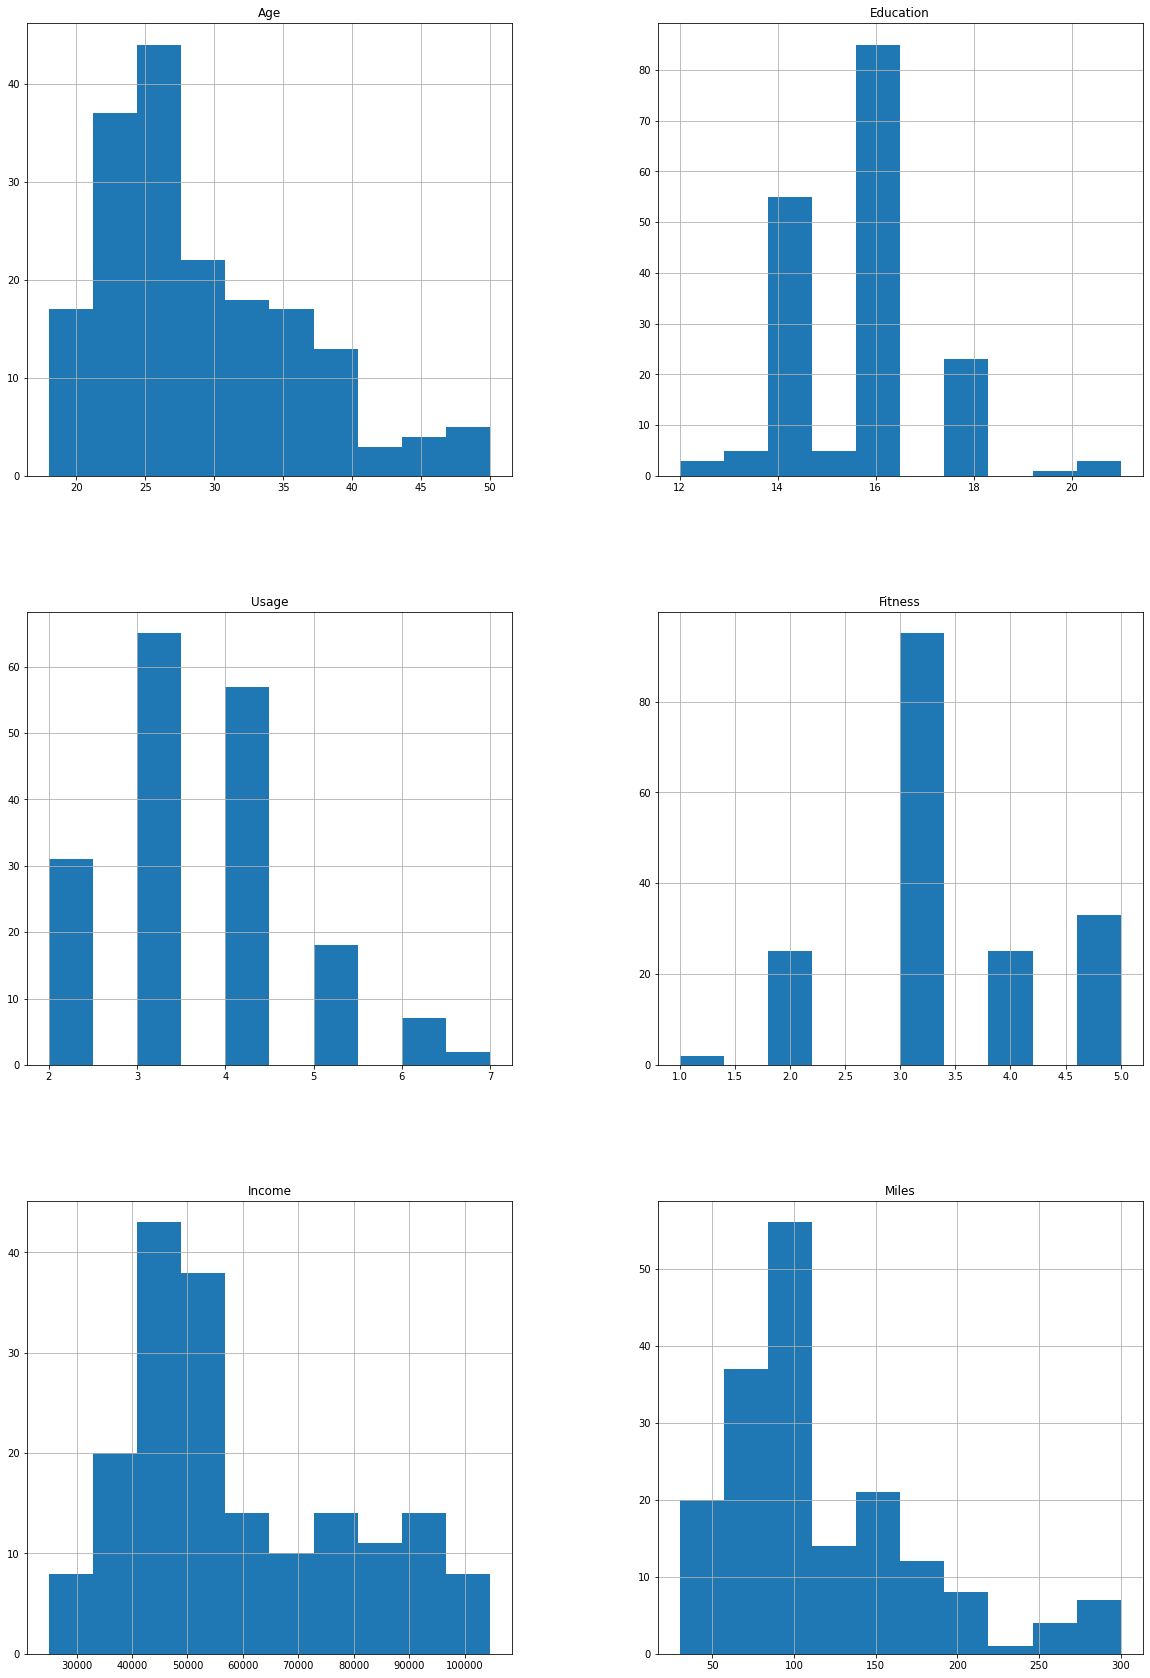

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

mydata.hist(figsize=(20,30))

<AxesSubplot:xlabel='Gender', ylabel='Age'>

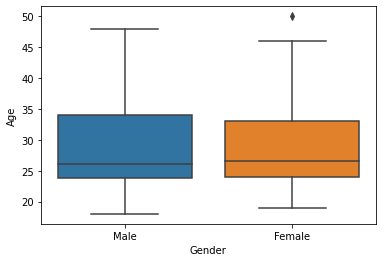

In [34]:
import seaborn as sns

sns.boxplot(x="Gender", y="Age", data=mydata)

In [35]:
pd.crosstab(mydata['Product'],mydata['Gender'] )

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


In [36]:
pd.crosstab(mydata['Product'],mydata['MaritalStatus'] )

MaritalStatus,Partnered,Single
Product,,
TM195,49,31
TM498,36,24
TM798,23,17


<AxesSubplot:xlabel='Product', ylabel='count'>

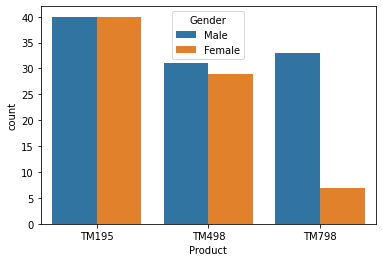

In [10]:
sns.countplot(x="Product", hue="Gender", data=mydata)

In [11]:
pd.pivot_table(mydata, index=['Product', 'Gender'],
                     columns=[ 'MaritalStatus'], aggfunc=len)

Age        Education          Fitness           Income  \
MaritalStatus  Partnered Single Partnered Single Partnered Single Partnered   
Product Gender                                                                
TM195   Female        27     13        27     13        27     13        27   
        Male          22     18        22     18        22     18        22   
TM498   Female        15     14        15     14        15     14        15   
        Male          21     10        21     10        21     10        21   
TM798   Female         4      3         4      3         4      3         4   
        Male          19     14        19     14        19     14        19   

                          Miles            Usage         
MaritalStatus  Single Partnered Single Partnered Single  
Product Gender                                           
TM195   Female     13        27     13        27     13  
        Male       18        22     18        22     18  
TM498   Female     14        15     14        15     14  
        Male       10        21     10        21     10  
TM798   Female      3         4      3         4      3  
        Male       14        19     14        19     14

In [12]:
pd.pivot_table(mydata,'Income', index=['Product', 'Gender'],
                     columns=[ 'MaritalStatus'])

MaritalStatus      Partnered        Single
Product Gender                            
TM195   Female  48008.851852  54661.615385
        Male    52157.636364  51235.222222
TM498   Female  53450.800000  45119.857143
        Male    54485.904762  49067.200000
TM798   Female  94003.750000  86012.333333
        Male    83466.263158  80182.071429

In [13]:
pd.pivot_table(mydata,'Miles', index=['Product', 'Gender'],
                     columns=[ 'MaritalStatus'])

MaritalStatus    Partnered      Single
Product Gender                        
TM195   Female   81.444444   98.230769
        Male     90.045455  101.888889
TM498   Female   94.333333   82.428571
        Male    101.095238   95.600000
TM798   Female  208.500000  205.000000
        Male    200.947368  179.642857

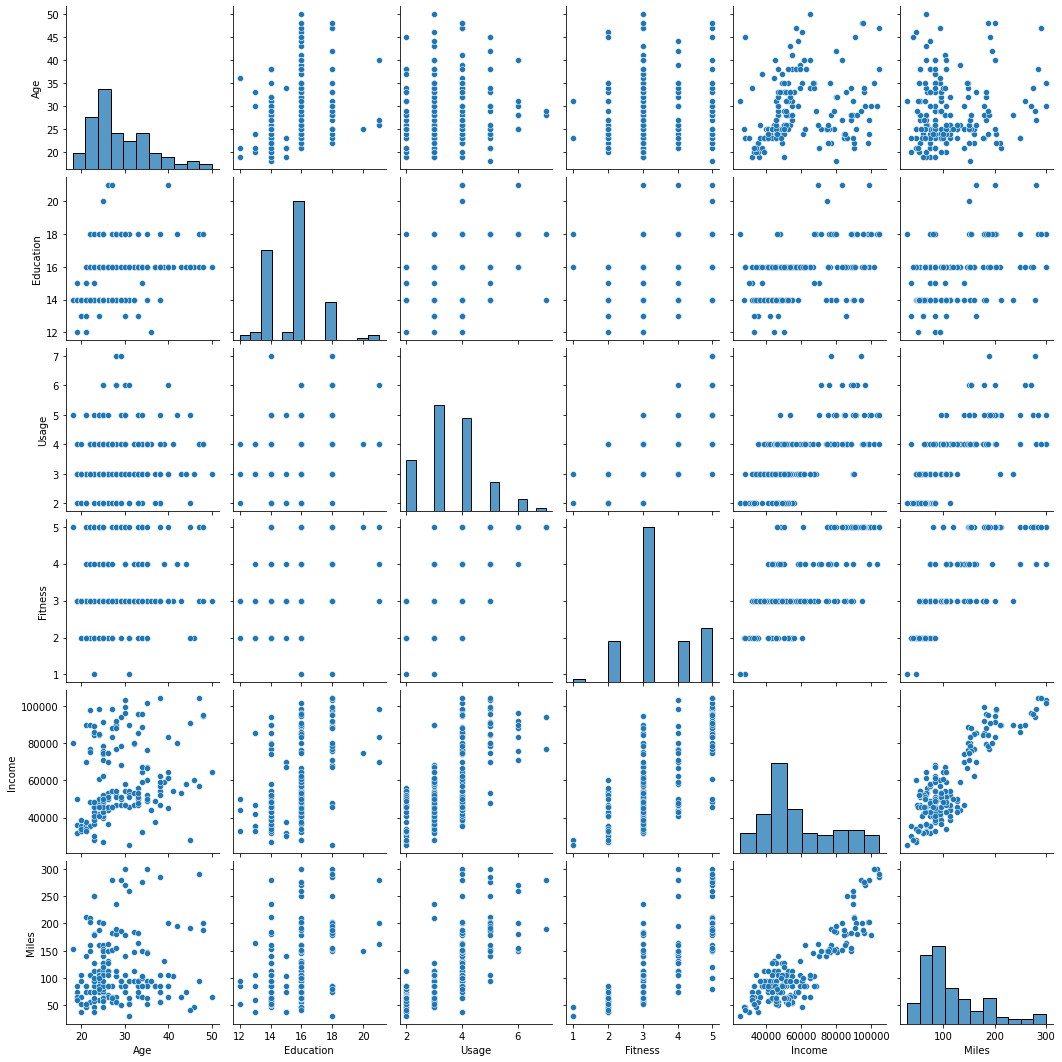

In [14]:
sns.pairplot(mydata)

In [15]:
mydata['Age'].std()

6.943498135399795

In [16]:
mydata['Age'].mean()

28.788888888888888

C:\Users\shivam1\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

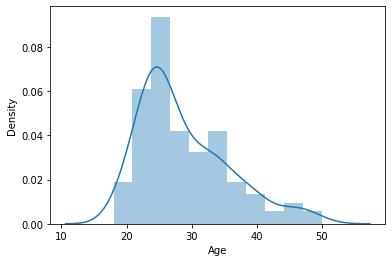

In [17]:
sns.distplot(mydata['Age'])

array([<AxesSubplot:title={'center':'Female'}>,
       <AxesSubplot:title={'center':'Male'}>], dtype=object)

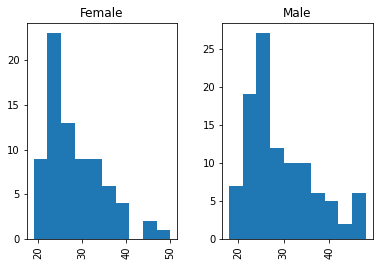

In [18]:
mydata.hist(by='Gender',column = 'Age')

array([<AxesSubplot:title={'center':'Female'}>,
       <AxesSubplot:title={'center':'Male'}>], dtype=object)

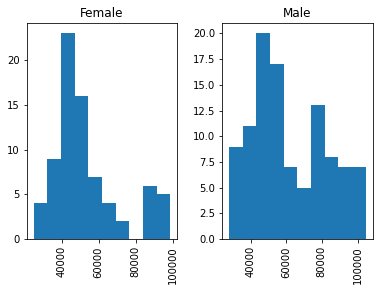

In [19]:
mydata.hist(by='Gender',column = 'Income')

array([<AxesSubplot:title={'center':'Female'}>,
       <AxesSubplot:title={'center':'Male'}>], dtype=object)

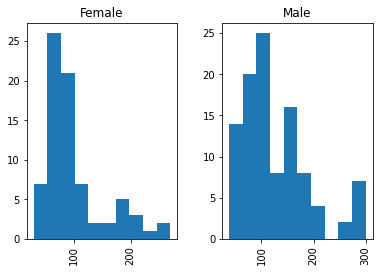

In [20]:
mydata.hist(by='Gender',column = 'Miles')

array([[<AxesSubplot:title={'center':'TM195'}>,
        <AxesSubplot:title={'center':'TM498'}>],
       [<AxesSubplot:title={'center':'TM798'}>, <AxesSubplot:>]],
      dtype=object)

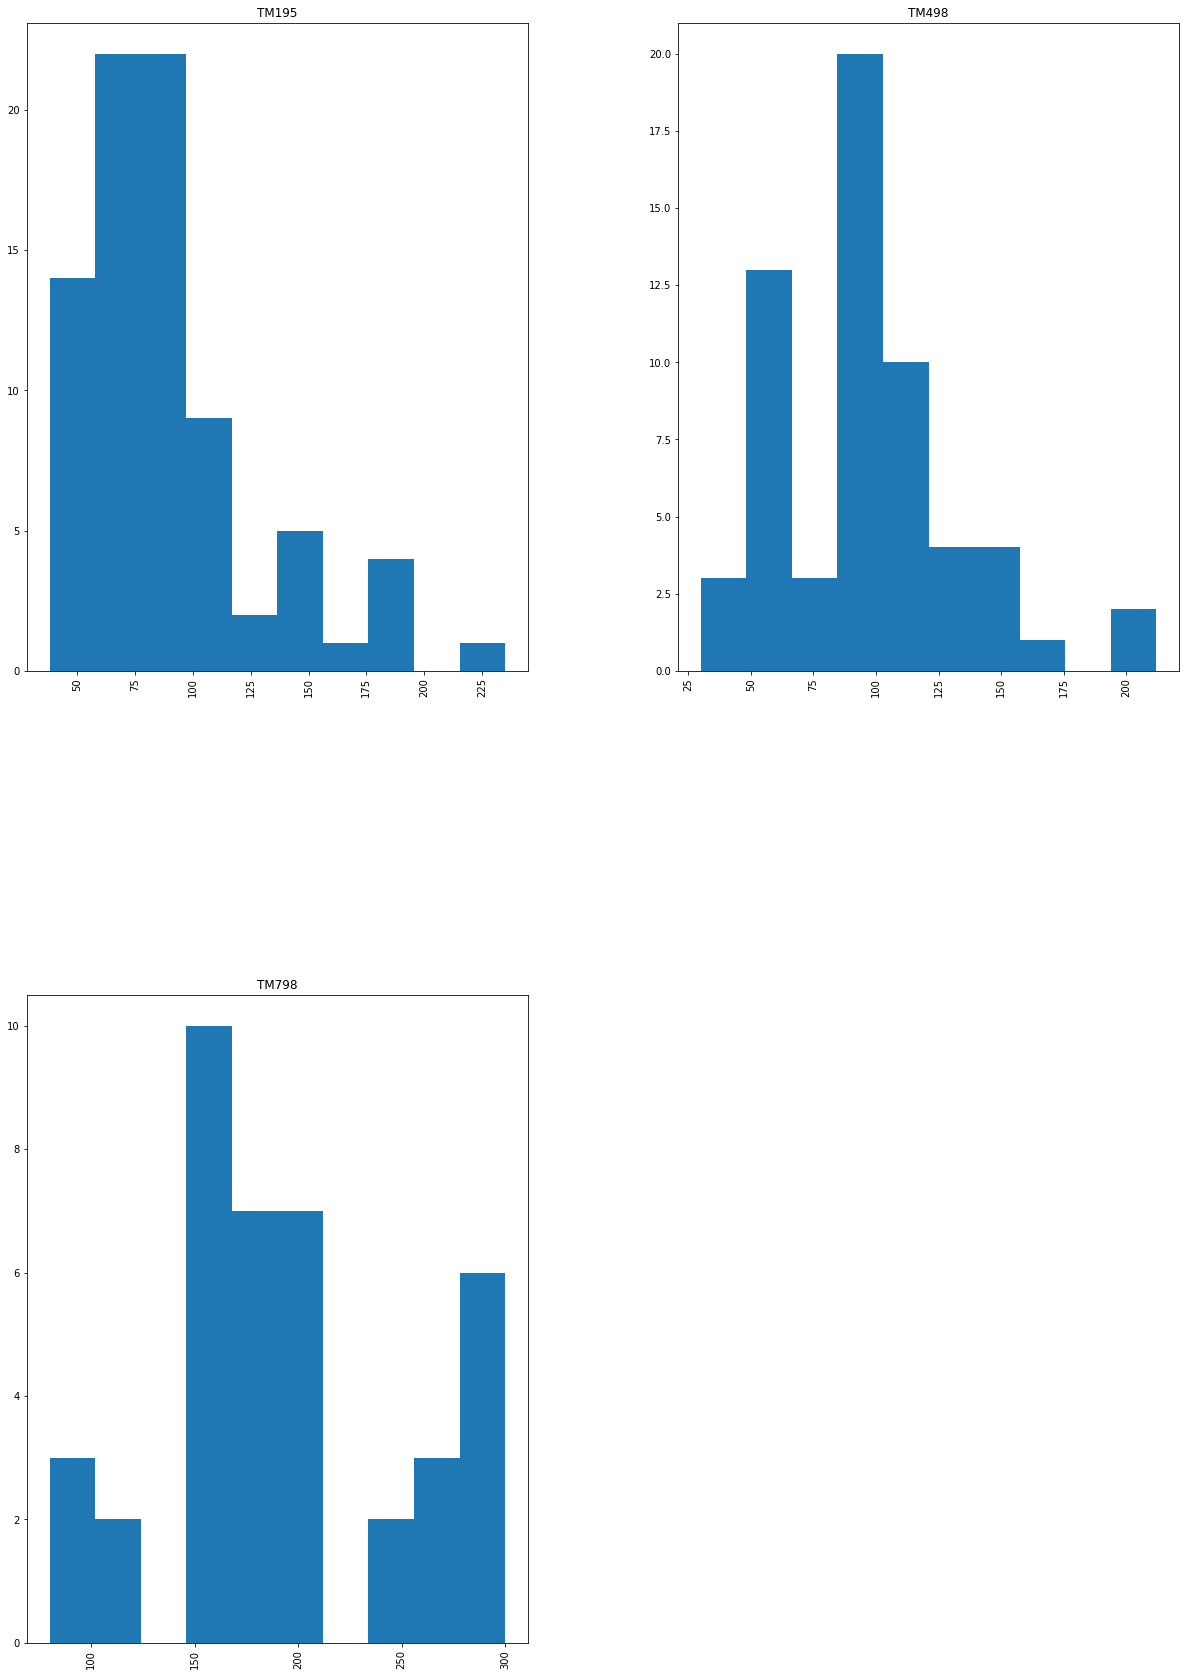

In [21]:
mydata.hist(by='Product',column = 'Miles', figsize=(20,30))

In [22]:
corr = mydata.corr()
corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.023240,0.054782,0.277686,0.091357
Education,0.280496,1.000000,0.377049,0.393380,0.484276,0.407249
Usage,0.023240,0.377049,1.000000,0.679965,0.653119,0.710385
Fitness,0.054782,0.393380,0.679965,1.000000,0.698233,0.737555
Income,0.277686,0.484276,0.653119,0.698233,1.000000,0.870747
Miles,0.091357,0.407249,0.710385,0.737555,0.870747,1.000000


<AxesSubplot:>

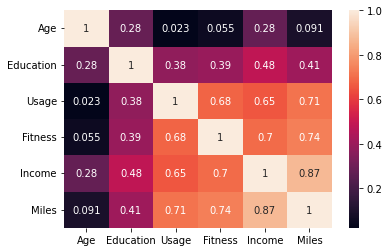

In [23]:
sns.heatmap(corr, annot=True)

In [24]:
# Simple Linear Regression


#Load function from sklearn
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

y = mydata['Miles']
x = mydata[['Usage','Fitness']]

# Train the model using the training sets
regr.fit(x,y)



LinearRegression()

In [25]:
regr.coef_

array([21.70407269, 29.4413565 ])

In [26]:
regr.intercept_

-59.43314709088283

In [27]:
# MilesPredicted = -56.74 + 20.21*Usage + 27.20*Fitness